In [1]:
import numpy as np
import matplotlib.pyplot as plt

We consider a model for atmospheric chaos theory with the following equations:
$$ \frac{dx}{dt} = \sigma(y-x)$$
$$ \frac{dy}{dt} = x(\rho-z)-y$$
$$ \frac{dz}{dt} = xy-\beta z$$


and the following initial conditions*:
$$ x(t=0) = 1$$
$$ y(t=0) = 1$$ 
$$ z(t=0) = 1$$

*note x(t=0) will change in the latter part

and these parameters  
$$\sigma = 10 $$ 
$$\rho = 28 $$
$$\beta = 8/3 $$

In [2]:
#parameters
sigma=10.
rho=28.
beta=8/3.
ti=0.
tf=100
dt=0.01
itr= int(tf/dt)

In [3]:
#pre-allocation
x = np.zeros(itr+1) 
y = np.zeros(itr+1)
z = np.zeros(itr+1)

In [4]:
#initial conditions
x[0]=1.
y[0]=1.
z[0]=1.

In [5]:
#functions
fx= lambda x,y: sigma*(y-x) 
fy= lambda x,y,z: (x*(rho-z))-y
fz= lambda x,y,z: (x*y)-(beta*z)

In [6]:
#euler-richardson
for i in np.arange(0,itr):
    k1_x = fx(x[i],y[i])*dt
    k1_y = fy(x[i],y[i],z[i])*dt
    k1_z = fz(x[i],y[i],z[i])*dt
    
    k2_x = fx((x[i]+(0.5*k1_x)),(y[i]+(0.5*k1_y)))*dt  #maybe just dt?
    k2_y = fy((x[i]+(0.5*k1_x)),(y[i]+(0.5*k1_y)),(z[i]+(0.5*k1_z)))*dt
    k2_z = fz((x[i]+(0.5*k1_x)),(y[i]+(0.5*k1_y)),(z[i]+(0.5*k1_z)))*dt
    
    x[i+1] = x[i] + k2_x
    y[i+1] = y[i] + k2_y
    z[i+1] = z[i] + k2_z

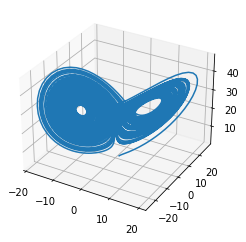

In [7]:
# 3D plot
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(x,y,z)

In [8]:
#Runge Kutta 4
#x,y,z = m,n,p to avoid confusion
sigma=10.
rho=28.
beta=8/3.
ti=0.
tf=100
dt=0.01
itr=int(tf/dt)
m = np.zeros(itr+1) 
n = np.zeros(itr+1)
p = np.zeros(itr+1)
m[0]=1.
n[0]=1.
p[0]=1.
fm= lambda m,n: sigma*(n-m)  
fn= lambda m,n,p: m*(rho-p)-n
fp= lambda m,n,p: m*n-(beta*p)

for i in np.arange(0,itr):
    k1_m = fm(m[i],n[i])*dt
    k1_n = fn(m[i],n[i],p[i])*dt
    k1_p = fp(m[i],n[i],p[i])*dt
    
    k2_m = (fm(m[i]+(0.5*k1_m),n[i]+(0.5*k1_n)))*dt  
    k2_n = (fn(m[i]+(0.5*k1_m),n[i]+(0.5*k1_n),p[i]+(0.5*k1_p)))*dt
    k2_p = (fp(m[i]+(0.5*k1_m),n[i]+(0.5*k1_n),p[i]+(0.5*k1_p)))*dt
    
    k3_m = (fm(m[i]+(0.5*k2_m),n[i]+(0.5*k2_n)))*dt  
    k3_n = (fn(m[i]+(0.5*k2_m),n[i]+(0.5*k2_n),p[i]+(0.5*k2_p)))*dt
    k3_p = (fp(m[i]+(0.5*k2_m),n[i]+(0.5*k2_n),p[i]+(0.5*k2_p)))*dt
    
    k4_m = (fm(m[i]+(k3_m),n[i]+(k3_n)))*dt  
    k4_n = (fn(m[i]+(k3_m),n[i]+(k3_n),p[i]+(k3_p)))*dt
    k4_p = (fp(m[i]+(k3_m),n[i]+(k3_n),p[i]+(k3_p)))*dt
    
    m[i+1] = m[i] + (1/6)*(k1_m+(2*k2_m)+(2*k3_m)+k4_m)
    n[i+1] = n[i] + (1/6)*(k1_n+(2*k2_n)+(2*k3_n)+k4_n)
    p[i+1] = p[i] + (1/6)*(k1_p+(2*k2_p)+(2*k3_p)+k4_p)

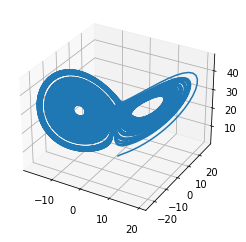

In [9]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(m,n,p)

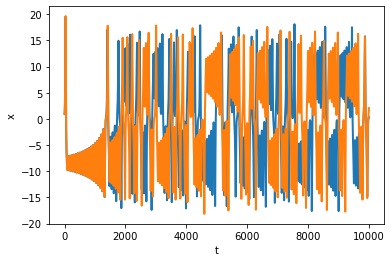

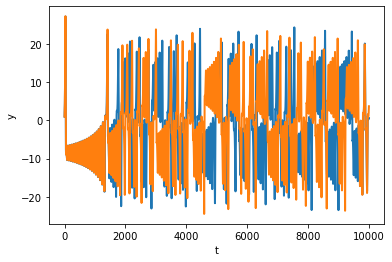

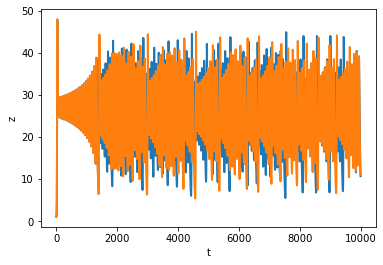

In [10]:
# ER and RK4 plotted together
figx=plt.figure()
plt.xlabel('t')
plt.ylabel('x')
plt.plot(m,linewidth=2)
plt.plot(x,linewidth=2)

figy=plt.figure()
plt.xlabel('t')
plt.ylabel('y')
plt.plot(n,linewidth=2)
plt.plot(y,linewidth=2)

figz=plt.figure()
plt.xlabel('t')
plt.ylabel('z')
plt.plot(p,linewidth=2)
plt.plot(z,linewidth=2)

#They are slighty off of eachother, RK4 is more accurate than Euler-Richardson

In [11]:
sigma=10.  #ask what it means by plot x only???
rho=28.
beta=8/3.
ti=0.
tf=100
dt=0.01
itr=int(tf/dt)
mx = np.zeros(itr+1) 
n = np.zeros(itr+1)
p = np.zeros(itr+1)
mx[0]=1.000000001
n[0]=1.
p[0]=1.
fmx= lambda mx,n: sigma*(n-mx)  
fn= lambda mx,n,p: mx*(rho-p)-n
fp= lambda mx,n,p: mx*n-(beta*p)

for i in np.arange(0,itr):
    k1_mx = fmx(mx[i],n[i])*dt
    k1_n = fn(mx[i],n[i],p[i])*dt
    k1_p = fp(mx[i],n[i],p[i])*dt
    
    k2_mx = (fmx(mx[i]+(0.5*k1_mx),n[i]+(0.5*k1_n)))*dt  
    k2_n = (fn(mx[i]+(0.5*k1_mx),n[i]+(0.5*k1_n),p[i]+(0.5*k1_p)))*dt
    k2_p = (fp(mx[i]+(0.5*k1_mx),n[i]+(0.5*k1_n),p[i]+(0.5*k1_p)))*dt
    
    k3_mx = (fmx(mx[i]+(0.5*k2_mx),n[i]+(0.5*k2_n)))*dt  
    k3_n = (fn(mx[i]+(0.5*k2_mx),n[i]+(0.5*k2_n),p[i]+(0.5*k2_p)))*dt
    k3_p = (fp(mx[i]+(0.5*k2_mx),n[i]+(0.5*k2_n),p[i]+(0.5*k2_p)))*dt
    
    k4_mx = (fmx(mx[i]+(k3_mx),n[i]+(k3_n)))*dt  
    k4_n = (fn(mx[i]+(k3_mx),n[i]+(k3_n),p[i]+(k3_p)))*dt
    k4_p = (fp(mx[i]+(k3_mx),n[i]+(k3_n),p[i]+(k3_p)))*dt
    
    mx[i+1] = mx[i] + (1/6)*(k1_mx+(2*k2_mx)+(2*k3_mx)+k4_mx)
    n[i+1] = n[i] + (1/6)*(k1_n+(2*k2_n)+(2*k3_n)+k4_n)
    p[i+1] = p[i] + (1/6)*(k1_p+(2*k2_p)+(2*k3_p)+k4_p)

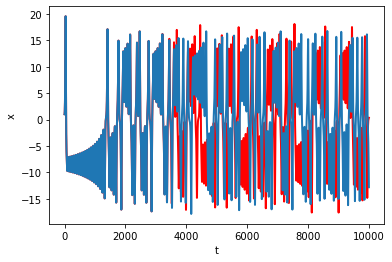

In [14]:

fig=plt.figure()
plt.xlabel('t')
plt.ylabel('x')
plt.plot(m,'r',linewidth=2)
plt.plot(mx,linewidth=2)

#the variation in initial value of x causes a slight shift in the latter part